In [1]:
!pip install tensorflow==2.8.0
!pip install tensorflow_io==0.25.0
!pip install matplotlib
!pip install librosa

  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numba-0.60.0-cp310-cp310-win_amd64.whl.metadata (2.8 kB)
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata (14 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-0.5.0.post1-cp310-cp310-win_amd64.whl.metadata (5.6 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached msgpack-1.1.0-cp310-cp310-win_amd64.whl.metadata (8.6 kB)
  Using cached llvmlite-0.43.0-cp310-cp310-win_amd64.whl.metadata (4.9 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached librosa-0.10.2.post1-py3-none-any.whl (260 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached joblib-1.4.2-py3-none-any.wh

In [8]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      2.1.0
aiohappyeyeballs             2.4.0
aiohttp                      3.10.5
aiosignal                    1.2.0
anyio                        4.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        24.2.0
audioread                    3.0.1
Babel                        2.11.0
beautifulsoup4               4.12.3
bleach                       6.2.0
blinker                      1.6.2
Brotli                       1.0.9
cachetools                   5.3.3
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.1
contourpy                   

In [2]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import librosa
import numpy as np

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint

In [91]:
data = os.path.join('belize-data')
train_dir = os.path.join('belize-data', 'Training data')
val_dir = os.path.join('belize-data', 'Validation data')
background_dir = os.path.join('belize-data', 'Training data', 'Background')
gunshot_dir = os.path.join('belize-data', 'Training data', 'Gunshot')
model_save_dir = os.path.join('model_exports')
outputs_dir = os.path.join('outputs')

In [71]:
background_wav = os.path.join('belize-data', 'Training data', 'Background', '5B1E8AFA.wav')
gunshot_wav = os.path.join('belize-data', 'Training data', 'Gunshot', '5B9FE44F_3709e9f5ff-aa0a-4ba9-9e61-d64d9666527614b02738-a1c6-43fb-b13e-0651261d1ca002c1d2c0-064c-4f43-b3a6-9da25d3e0930.wav')

In [86]:
def load_wav_8k_mono(filename):
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    if sample_rate != 8000:
        wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=8000)
    return wav

In [84]:
nwav = load_wav_8k_mono(background_wav)
wav = load_wav_8k_mono(gunshot_wav)

<function matplotlib.pyplot.show(close=None, block=None)>

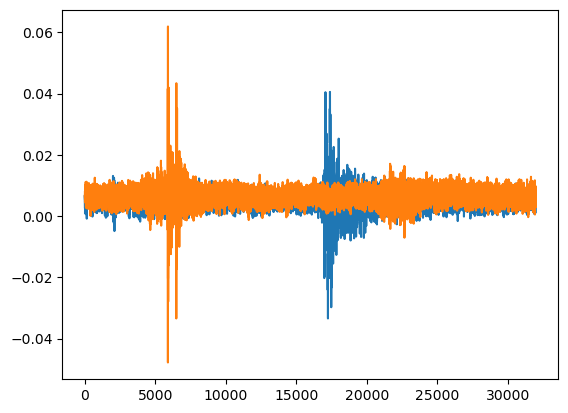

In [88]:
plt.plot(wav)
plt.plot(nwav)
plt.show

In [99]:
len(nwav)

32000

In [98]:
print(8000*4)

32000


In [ ]:
frames = tf.signal.frame(wav, frame_length=frame_length, frame_step=frame_step)
fft_magnitude = tf.abs(tf.signal.rfft(frames))